<a href="https://colab.research.google.com/github/myhang110703/AI/blob/main/1.%20Introduction/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explaining Feature Importance by example of a Random Forest
In many (business) cases it is equally important to not only have an accurate, but also an interpretable model. Oftentimes, apart from wanting to know what our model's house price prediction is, we also wonder why it is this high/low and which features are most important in determining the forecast Another example might be predicting customer churn - it is very nice to have a model that is successfully predicting which customers are prone to churn, but identifying which variables are important can help us in early detection and maybe even improving the product/service!

Knowing feature importance indicated by machine learning models can benefit you in multiple ways, here are some examples:

by getting a better understanding of the model's logic you can not only verify it being correct, but also work on improving the model by focusing only on the important variables
the above can be used for variable selection - you can remove x variables that are not that significant and have similar or better performance in much shorter training time
in some business cases it makes sense to sacrifice some accuracy for the sake of interpretability. For example, when a bank rejects a loan application, it must also have a reasoning behind the decision, which can also be presented to the customer
That is why in this article I would like to explore different approaches to interpreting feature importance by example of a Random Forest model. Most of them are also applicable to different models, starting from linear regression and ending with black-boxes such as XGBoost.

One thing to note is that the more accurate our model is, the more we can trust feature importance measures and other interpretations. I assume that the model we build is reasonably accurate (as each data scientist will strive to have such a model) and in this article I focus on importance measures.

In [16]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt

In [26]:
dataset = pd.read_csv('/content/Kaggle/train_2016_v2.csv')
X = dataset.iloc[:,0:20] #independent columns
y = dataset.iloc[:,-1] # pick last column for the target feature

In [28]:
model = ExtraTreesClassifier()

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})

In [57]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = raw_df.to_numpy()

In [55]:
raw_df

array('http://lib.stat.cmu.edu/datasets/boston', dtype='<U39')

In [58]:
boston

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.0000e+00, 2.9600e+02,
        1.5300e+01],
       [3.9690e+02, 4.9800e+00, 2.4000e+01, ...,        nan,        nan,
               nan],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.0000e+00, 2.4200e+02,
        1.7800e+01],
       ...,
       [3.9345e+02, 6.4800e+00, 2.2000e+01, ...,        nan,        nan,
               nan],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01],
       [3.9690e+02, 7.8800e+00, 1.1900e+01, ...,        nan,        nan,
               nan]])

In [61]:
boston1 = boston.reshape(-1)

In [62]:
boston1

array([6.32e-03, 1.80e+01, 2.31e+00, ...,      nan,      nan,      nan])

In [36]:
# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [63]:
y =boston1.target
X = pd.DataFrame(boston.data, columns = boston.feature_names)
np.random.seed(seed = 42)
X['random'] = np.random.random(size = len(X))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

AttributeError: 'numpy.ndarray' object has no attribute 'target'

https://github.com/erykml/medium_articles/blob/master/Machine%20Learning/feature_importance.ipynb

In [71]:
house_prices = datasets.load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [68]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [69]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [74]:
y =housing.target
X = pd.DataFrame(housing.data, columns = housing.feature_names)
np.random.seed(seed = 42)
X['random'] = np.random.random(size = len(X))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

Text(0.5, 1.0, 'Random feature vs. target variable')

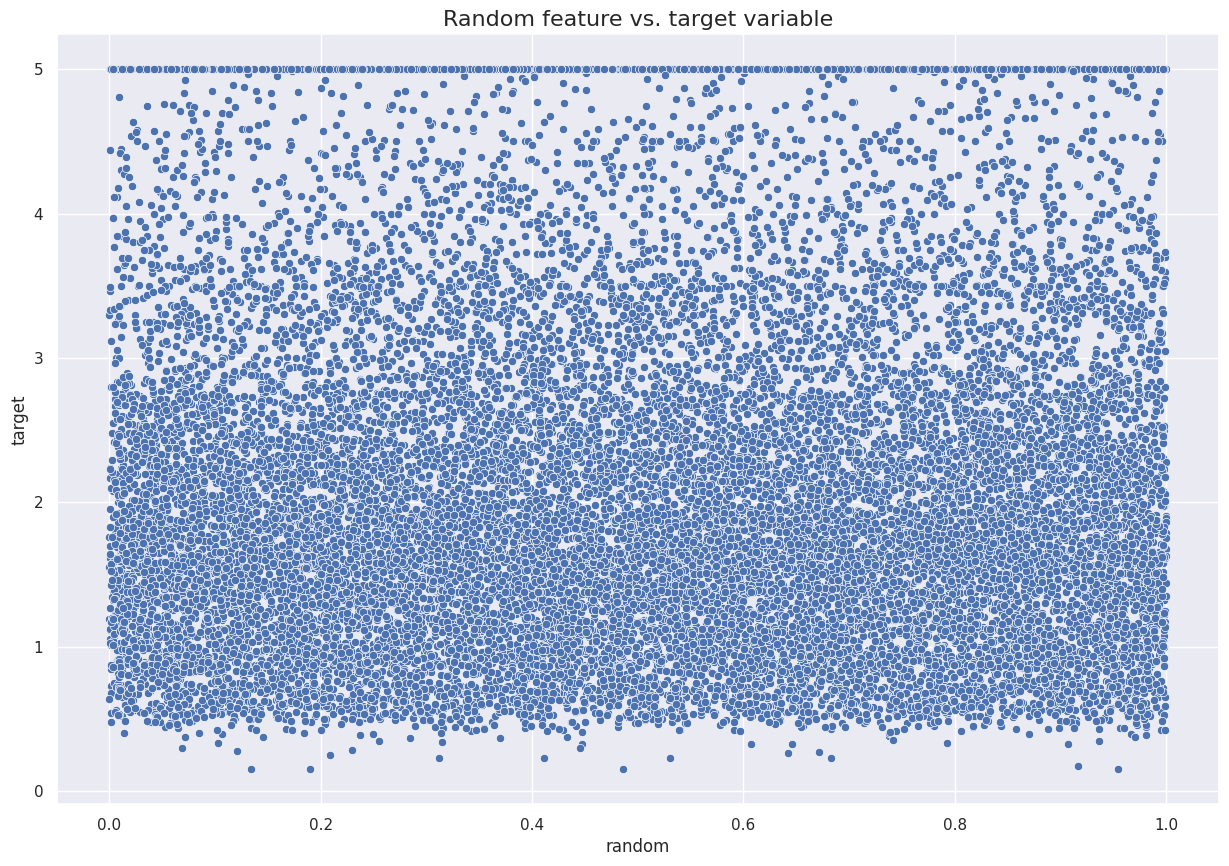

In [75]:
sns.scatterplot(x = 'random', y = 'target', data = X.assign(target = y)).set_title('Random feature vs. target variable', fontsize = 16)

Text(0.5, 1.0, 'Correlation matrix')

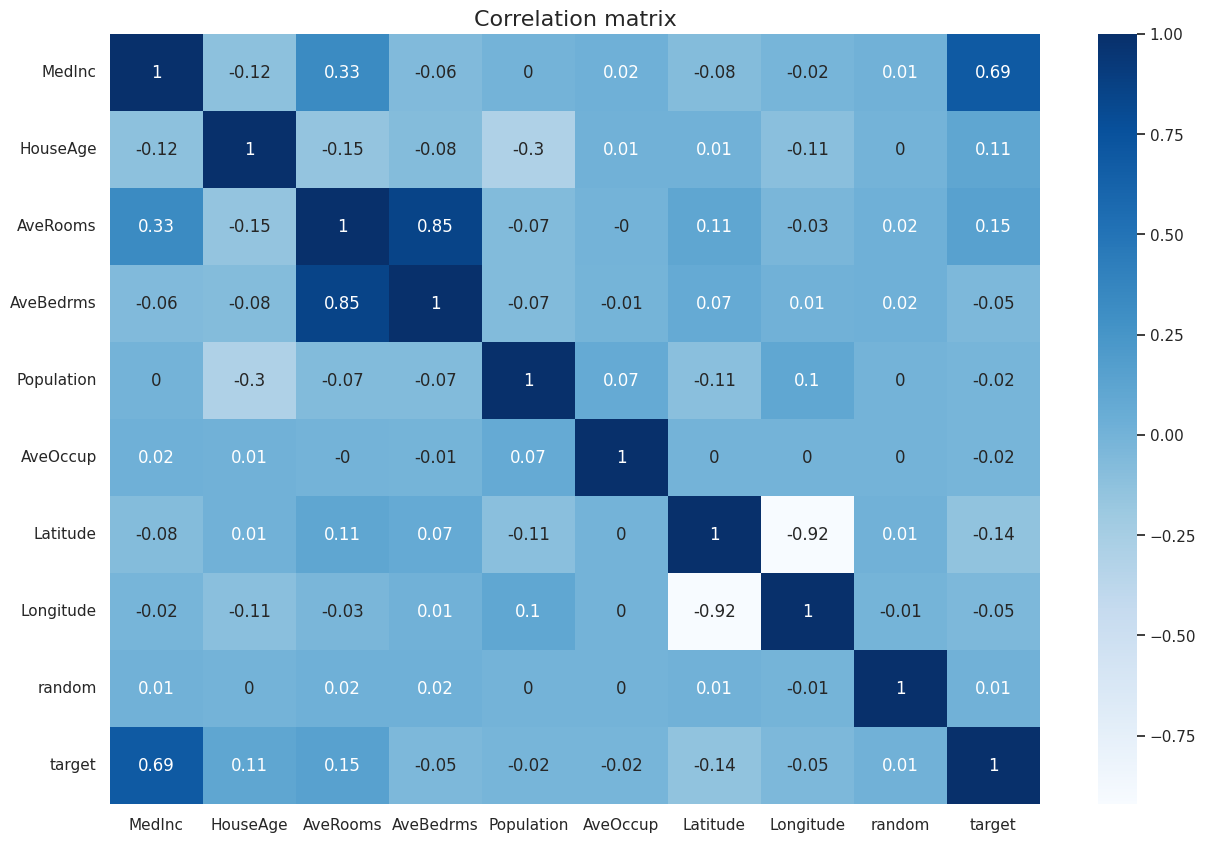

In [76]:
sns.heatmap(X.assign(target = y).corr().round(2), cmap = 'Blues', annot = True).set_title('Correlation matrix', fontsize = 16)


In [77]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [78]:
print(f"""R^2 Training Score: {rf.score(X_train, y_train):.2f}
OOB Score: {rf.oob_score_:.2f}
R^2 Validation Score: {rf.score(X_valid, y_valid):.2f}""")

R^2 Training Score: 0.97
OOB Score: 0.80
R^2 Validation Score: 0.80


In [79]:
base_imp = imp_df(X_train.columns, rf.feature_importances_)
base_imp

,feature,feature_importance
0,MedInc,0.522760
1,AveOccup,0.136057
2,Latitude,0.086289
3,Longitude,0.086273
4,HouseAge,0.052750
5,AveRooms,0.042108
6,Population,0.028457
7,AveBedrms,0.027587
8,random,0.017717


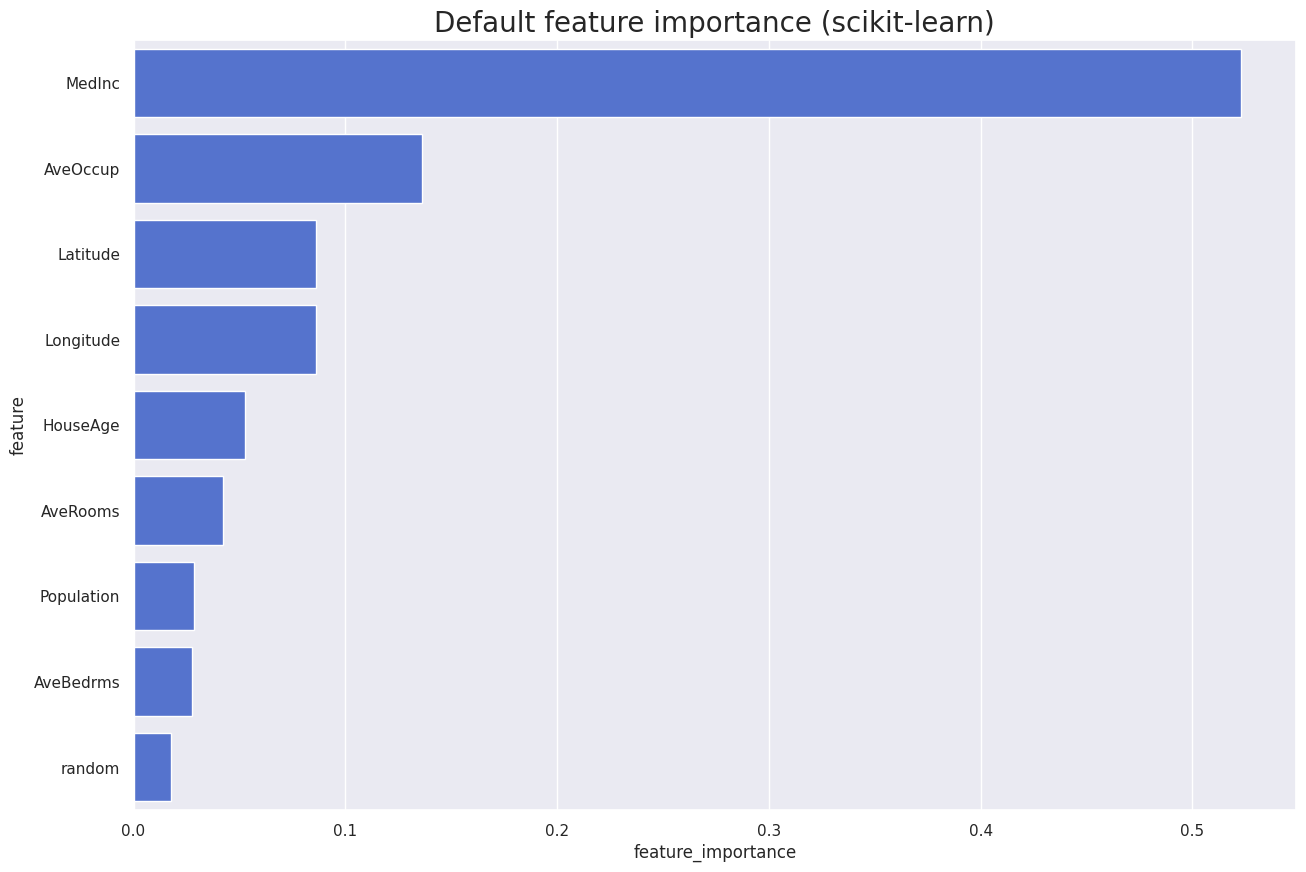

In [80]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

In [81]:
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(X_train, figsize=(15,10))
viz.view()

ModuleNotFoundError: No module named 'rfpimp'